In [1]:
import pandas as pd

In [290]:
df = pd.read_pickle('../data/feature_dumps/features.pkl')

In [247]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

In [248]:
df.columns.values

array(['Blog', 'Gender', 'FMeasure', 'CharLength', 'TFPunctuation',
       'TFStopWords', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 'f10', 'f11', 'ConversationCount', 'AtHomeCount',
       'FamilyCount', 'TimeCount', 'WorkCount', 'PastActionsCount',
       'GamesCount', 'InternetCount', 'LocationCount', 'FunCount',
       'Food/ClothesCount', 'PoeticCount', 'Books/MoviesCount',
       'ReligionCount', 'RomanceCount', 'SwearingCount', 'PoliticsCount',
       'MusicCount', 'SchoolCount', 'BusinessCount', 'PositiveCount',
       'NegativeCount', 'EmotionCount', 'ProperNounCount',
       'SentenceCount', 'AvgSentLength', 'NN', 'NNPS', 'VBD', 'VBZ', 'MD',
       'EX', 'IN', 'VB', 'JJR', 'JJS', 'PRP', 'WDT', 'JJ', 'VBP', 'NNS',
       'VBN', 'DT', 'RB', 'WP', 'VBG', 'NNP', 'RBR', 'PRP$', 'JJ NN',
       'VBP VB', 'VBD PRP', 'IN IN', 'NNP VBZ', 'RB DT', 'NN VBG',
       'IN JJ', 'NN NN', 'RB VBZ', 'VBG DT', 'NN NNS', 'VBZ JJ', 'IN RB',
       'JJ JJ', 'NN VBZ', 'IN VBG', 'V

In [129]:
print("Male upper chars = ", df[df.Gender=='M'].UpperCaseChars.values.mean())
print("Female upper chars = ", df[df.Gender=='F'].UpperCaseChars.values.mean())
print()
print("Male upper words = ", df[df.Gender=='M'].UpperCaseWords.values.mean())
print("Female upper words = ", df[df.Gender=='F'].UpperCaseWords.values.mean())
print()
print("Male title words = ", df[df.Gender=='M'].TitleCaseWords.values.mean())
print("Female title words = ", df[df.Gender=='F'].TitleCaseWords.values.mean())

Male upper chars =  73.96469180131658
Female upper chars =  66.46982478909798

Male upper words =  11.381807301017355
Female upper words =  14.085009733939001

Male title words =  53.4524236983842
Female title words =  48.850746268656714


In [130]:
import numpy as np
print("Male upper chars = ", np.median(df[df.Gender=='M'].UpperCaseChars.values))
print("Female upper chars = ", np.median(df[df.Gender=='F'].UpperCaseChars.values))
print()
print("Male upper words = ", np.median(df[df.Gender=='M'].UpperCaseWords.values))
print("Female upper words = ", np.median(df[df.Gender=='F'].UpperCaseWords.values))
print()
print("Male title words = ", np.median(df[df.Gender=='M'].TitleCaseWords.values))
print("Female title words = ", np.median(df[df.Gender=='F'].TitleCaseWords.values))

Male upper chars =  28.0
Female upper chars =  26.0

Male upper words =  4.0
Female upper words =  6.0

Male title words =  21.0
Female title words =  19.0


In [24]:
from sklearn.model_selection import train_test_split

In [146]:
male_count = len(df[df.Gender == 'M'].index)
female_count = len(df[df.Gender == 'F'].index)
fraction = female_count / male_count
print(male_count, female_count, frac)
df2 = df.copy()
df2 = df2.drop(df2[df2.Gender == 'M'].sample(frac=1 - fraction).index)
print(len(df2[df2.Gender=='M'].index))
df2['Blog'] = df2['Blog'].values.astype(str)
blogs = df2.Blog.values
genders = df2.Gender.values

btr, bte, gtr, gte = train_test_split(blogs, genders, test_size=0.25, shuffle=True, stratify=genders)
btr = pd.Series(btr, name='Blog')
gtr = pd.Series(gtr, name='Gender')
traindf = pd.concat([btr, gtr], axis=1)
bte = pd.Series(bte, name='Blog')
gte = pd.Series(gte, name='Gender')
testdf = pd.concat([bte, gte], axis=1)

print("Males in training = ", traindf[traindf.Gender == 'M'].values.shape[0])
print("Females in training = ", traindf[traindf.Gender == 'F'].values.shape[0])
print()
print("Males in test = ", testdf[testdf.Gender == 'M'].values.shape[0])
print("Females in test = ", testdf[testdf.Gender == 'F'].values.shape[0])
print()
print("Total males = ", traindf[traindf.Gender == 'M'].values.shape[0] + testdf[testdf.Gender == 'M'].values.shape[0])
print("Total Females = ", traindf[traindf.Gender == 'F'].values.shape[0] + testdf[testdf.Gender == 'F'].values.shape[0])

1671 1541 0.9219773674806433
1541
Males in training =  1155
Females in training =  1156

Males in test =  386
Females in test =  385

Total males =  1541
Total Females =  1541


In [149]:
from sklearn.feature_selection import VarianceThreshold

In [249]:
posdf = df[['NN', 'NNPS', 'VBD', 'VBZ', 'MD',
       'EX', 'IN', 'VB', 'JJR', 'JJS', 'PRP', 'WDT', 'JJ', 'VBP', 'NNS',
       'VBN', 'DT', 'RB', 'WP', 'VBG', 'NNP', 'RBR', 'PRP$', 'JJ NN',
       'VBP VB', 'VBD PRP', 'IN IN', 'NNP VBZ', 'RB DT', 'NN VBG',
       'IN JJ', 'NN NN', 'RB VBZ', 'VBG DT', 'NN NNS', 'VBZ JJ', 'IN RB',
       'JJ JJ', 'NN VBZ', 'IN VBG', 'VBP DT', 'VB NN', 'NNS VBP',
       'DT NNP', 'PRP VBZ', 'PRP VBD', 'PRP VB', 'NN PRP', 'NN DT',
       'VBZ VB', 'PRP VBP', 'PRP$ JJ', 'VBD IN', 'VB JJ', 'NN JJ',
       'RB VB', 'JJ NNP', 'RB VBG', 'VBZ PRP', 'VBD DT', 'RB RB', 'JJ VB',
       'PRP RB', 'JJ IN', 'VBD VB', 'VB IN', 'VBP PRP', 'VBD RB',
       'VBG IN', 'PRP IN', 'VB PRP', 'NN RB', 'NNP NN', 'VB VBN',
       'NN NNP', 'IN NN', 'VBP VBN', 'NN WDT', 'RB IN', 'DT JJ', 'RB VBD',
       'VBZ IN', 'NN MD', 'VB DT', 'NNS IN', 'NNP RB', 'VB PRP$',
       'VBP IN', 'RB VBP', 'NNS RB', 'DT NN', 'VBZ VBN', 'MD RB',
       'NNP IN', 'NN VBD', 'JJ NNS', 'NN VB', 'IN PRP$', 'MD VB',
       'RB PRP', 'NNS VB', 'VBZ DT', 'VBG NN', 'VBN IN', 'PRP$ NNS',
       'VB VB', 'VBP RB', 'NNP NNP', 'NN IN', 'VB RB', 'VBG PRP',
       'PRP MD', 'IN DT', 'NNP VBD', 'IN NNS', 'IN NNP', 'RB JJ',
       'IN PRP', 'VBD JJ', 'RB VBN', 'DT NNS', 'VBD VBN', 'PRP$ NN',
       'VBZ RB', 'VBP JJ', 'DT NN VBZ', 'PRP VBD IN', 'JJ NNP NN',
       'DT NNP NNP', 'RB IN PRP', 'IN JJ NN', 'JJ NN VB', 'IN NN IN',
       'IN DT NNS', 'NNS IN PRP', 'NN IN NNS', 'VBN IN DT', 'PRP VBP JJ',
       'DT NNP NN', 'VBZ DT NN', 'PRP VBP RB', 'IN DT JJ', 'MD RB VB',
       'JJ NN IN', 'RB DT NN', 'VBG DT NN', 'NNP NN NN', 'DT NNS IN',
       'DT NN IN', 'JJ NN NN', 'VB DT NN', 'DT JJ NNS', 'NN IN PRP$',
       'IN JJ NNS', 'NNS IN NN', 'VBZ DT JJ', 'PRP VBP DT', 'NNP NNP NN',
       'PRP VBP PRP', 'VB DT JJ', 'VB PRP$ NN', 'DT JJ JJ', 'IN PRP VBP',
       'DT NN VB', 'IN NNP NNP', 'NNS IN DT', 'VB IN DT', 'IN DT NNP',
       'NN IN NNP', 'IN PRP$ NN', 'DT JJ NN', 'NN NN IN', 'IN NN NN',
       'VBP DT NN', 'PRP MD VB', 'PRP$ NN NN', 'RB JJ NN', 'DT NN NN',
       'IN PRP$ JJ', 'VBD DT JJ', 'PRP VBP VB', 'NN NN NN', 'VBD DT NN',
       'NNP NNP NNP', 'PRP VBD VB', 'JJ NNS IN', 'IN DT NN', 'NN IN NN',
       'PRP VBP IN', 'PRP VBD DT', 'IN PRP VBD', 'NN IN JJ', 'DT NN RB',
       'NN IN PRP', 'NN IN DT', 'RB IN DT', 'JJ JJ NN', 'PRP$ NN IN',
       'RB PRP VBP', 'PRP$ JJ NN', 'IN DT JJ NN', 'NN IN DT NN',
       'NN IN PRP$ NN', 'NN IN DT JJ', 'IN DT NN VB', 'DT JJ NN IN',
       'IN DT NN NN', 'DT JJ NN NN', 'VB DT JJ NN', 'IN DT NNP NN',
       'DT NN IN PRP', 'JJ NN IN DT', 'DT NN IN NN', 'NNS IN DT NN',
       'VB DT NN IN', 'NN IN JJ NN', 'DT NN IN DT', 'JJ NN IN NN',
       'IN DT NN IN', 'DT NN IN DT NN', 'NN IN DT JJ NN',
       'DT JJ NN IN NN', 'JJ NN IN DT NN', 'DT VBZ', 'DT RB', 'VBD NN',
       'NNP VB', 'IN NNP NN', 'JJ NNS VB', 'PRP$ NN VB', 'VBN IN NN',
       'NN NN VB', 'PRP RB VB', 'VBZ NN', 'DT IN', 'DT VB', 'RB NN',
       'WP VB', 'VBP NN', 'DT DT', 'VBN NN', 'IN VB', 'WDT VB',
       'IN PRP VB', 'NNP NNP VB', 'NN IN VB', 'RB PRP VB', 'NN PRP VB']]

In [250]:
vt = VarianceThreshold(threshold=(.55 * (1 - .55)))

In [251]:
posdfc = vt.fit_transform(posdf)

In [252]:
posdfc.shape

(3212, 45)

In [253]:
posdf.shape

(3212, 248)

In [254]:
support = vt.get_support()

In [255]:
vt.get_params()

{'threshold': 0.2475}

In [256]:
support_loc = np.where(support == True)
print(support_loc[0])

[  8  25  26  28  33  39  40  49  52  53  56  64  66  67  68  69  74  87
  93 102 104 105 106 113 119 123 124 154 157 162 174 180 182 196 199 205
 212 216 218 223 232 236 242 246 247]


In [257]:
posdfc = posdf.copy()
for column in posdfc.columns.values:
    index = posdfc.columns.get_loc(column)
    print("Column and Index = ", column, index)
    if index not in support_loc[0]:
        print("Dropping column = ", column)
        posdf = posdf.drop(columns=[column])

Column and Index =  NN 0
Dropping column =  NN
Column and Index =  NNPS 1
Dropping column =  NNPS
Column and Index =  VBD 2
Dropping column =  VBD
Column and Index =  VBZ 3
Dropping column =  VBZ
Column and Index =  MD 4
Dropping column =  MD
Column and Index =  EX 5
Dropping column =  EX
Column and Index =  IN 6
Dropping column =  IN
Column and Index =  VB 7
Dropping column =  VB
Column and Index =  JJR 8
Column and Index =  JJS 9
Dropping column =  JJS
Column and Index =  PRP 10
Dropping column =  PRP
Column and Index =  WDT 11
Dropping column =  WDT
Column and Index =  JJ 12
Dropping column =  JJ
Column and Index =  VBP 13
Dropping column =  VBP
Column and Index =  NNS 14
Dropping column =  NNS
Column and Index =  VBN 15
Dropping column =  VBN
Column and Index =  DT 16
Dropping column =  DT
Column and Index =  RB 17
Dropping column =  RB
Column and Index =  WP 18
Dropping column =  WP
Column and Index =  VBG 19
Dropping column =  VBG
Column and Index =  NNP 20
Dropping column =  NNP

In [258]:
posdf.columns.values

array(['JJR', 'VBD PRP', 'IN IN', 'RB DT', 'VBG DT', 'IN VBG', 'VBP DT',
       'VBZ VB', 'VBD IN', 'VB JJ', 'JJ NNP', 'VBD VB', 'VBP PRP',
       'VBD RB', 'VBG IN', 'PRP IN', 'NN NNP', 'VBP IN', 'NNP IN',
       'VBG NN', 'PRP$ NNS', 'VB VB', 'VBP RB', 'NNP VBD', 'RB VBN',
       'VBZ RB', 'VBP JJ', 'NNS IN NN', 'NNP NNP NN', 'IN PRP VBP',
       'PRP MD VB', 'PRP VBP VB', 'VBD DT NN', 'JJ JJ NN', 'PRP$ JJ NN',
       'DT JJ NN IN', 'DT NN IN NN', 'DT NN IN DT', 'IN DT NN IN',
       'DT VBZ', 'PRP RB VB', 'RB NN', 'WDT VB', 'RB PRP VB', 'NN PRP VB'],
      dtype=object)

In [260]:
l = []
for c in posdfc.columns.values:
    if c not in posdf.columns.values:
        l.append(c)

In [291]:
cdf = df[['Gender', 'FMeasure', 'CharLength', 'TFPunctuation',
       'TFStopWords', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 'f10', 'f11', 'ConversationCount', 'AtHomeCount',
       'FamilyCount', 'TimeCount', 'WorkCount', 'PastActionsCount',
       'GamesCount', 'InternetCount', 'LocationCount', 'FunCount',
       'Food/ClothesCount', 'PoeticCount', 'Books/MoviesCount',
       'ReligionCount', 'RomanceCount', 'SwearingCount', 'PoliticsCount',
       'MusicCount', 'SchoolCount', 'BusinessCount', 'PositiveCount',
       'NegativeCount', 'EmotionCount', 'ProperNounCount',
       'SentenceCount', 'AvgSentLength', 'UpperCaseChars',
       'UpperCaseWords', 'TitleCaseWords']]

In [292]:
from math import fabs
for column in cdf.columns.values:
    if column != 'Gender':
        mval = df[df.Gender == 'M'][column].values.mean()
        fval = df[df.Gender == 'F'][column].values.mean()
        print("COLUMN = ", column)
        print("Male average ", mval)
        print("Female average ", fval)
        print("Absolute difference ", fabs(mval-fval))
        print("Male avg. / Female avg. ", mval / fval)
        print()

COLUMN =  FMeasure
Male average  112.6918013165769
Female average  97.91758598312784
Absolute difference  14.774215333449064
Male avg. / Female avg.  1.1508841867894375

COLUMN =  CharLength
Male average  2406.1149012567325
Female average  2259.6164828033743
Absolute difference  146.49841845335823
Male avg. / Female avg.  1.0648333111252606

COLUMN =  TFPunctuation
Male average  78.20406941950928
Female average  78.75989617131732
Absolute difference  0.5558267518080413
Male avg. / Female avg.  0.9929427693683215

COLUMN =  TFStopWords
Male average  168.12627169359664
Female average  163.09863724853992
Absolute difference  5.027634445056719
Male avg. / Female avg.  1.0308257293247356

COLUMN =  f1
Male average  0.6935966487133453
Female average  0.5418559377027904
Absolute difference  0.15174071101055486
Male avg. / Female avg.  1.2800388451104971

COLUMN =  f2
Male average  3.41771394374626
Female average  2.3776768332251783
Absolute difference  1.0400371105210815
Male avg. / Female av

In [294]:
for column in cdf.columns.values:
    if column != 'Gender':
        mval = np.median(df[df.Gender == 'M'][column].values)
        fval = np.median(df[df.Gender == 'F'][column].values)
        print("COLUMN = ", column)
        print("Male Median ", column, mval)
        print("Female Median ", column, fval)
        print("Absolute difference ", fabs(mval-fval))
        print("Male median. / Female median. ", mval / fval)
        print()

COLUMN =  FMeasure
Male Median  FMeasure 74.5
Female Median  FMeasure 68.0
Absolute difference  6.5
Male median. / Female median.  1.0955882352941178

COLUMN =  CharLength
Male Median  CharLength 1086.0
Female Median  CharLength 1025.0
Absolute difference  61.0
Male median. / Female median.  1.0595121951219513

COLUMN =  TFPunctuation
Male Median  TFPunctuation 33.0
Female Median  TFPunctuation 34.0
Absolute difference  1.0
Male median. / Female median.  0.9705882352941176

COLUMN =  TFStopWords
Male Median  TFStopWords 79.0
Female Median  TFStopWords 78.0
Absolute difference  1.0
Male median. / Female median.  1.0128205128205128

COLUMN =  f1
Male Median  f1 0.0
Female Median  f1 0.0
Absolute difference  0.0
Male median. / Female median.  nan

COLUMN =  f2
Male Median  f2 1.0
Female Median  f2 1.0
Absolute difference  0.0
Male median. / Female median.  1.0

COLUMN =  f3
Male Median  f3 0.0
Female Median  f3 0.0
Absolute difference  0.0
Male median. / Female median.  nan

COLUMN =  f4


/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [271]:
from matplotlib import pyplot as plt
import seaborn as sns

In [295]:
cdf.columns.values.shape

(45,)

In [289]:
snsplot = sns.pairplot(cdf, hue='Gender')
fig = snsplot.get_figure()
fig.saveFig('../data/PairPlots.png')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f70437dc510> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f70437e6f28> (for post_execute):


KeyboardInterrupt: 

In [298]:
mdf = cdf[cdf.Gender == 'M']
fdf = cdf[cdf.Gender == 'F']

# df['Fruit Total']= df.iloc[:, -4:-1].sum(axis=1)

mdf['TotalSum'] = mdf.iloc[:, -44:].sum(axis=1)
fdf['TotalSum'] = fdf.iloc[:, -44:].sum(axis=1)

/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [300]:
print(mdf.TotalSum.values.mean(), fdf.TotalSum.values.mean())

3144.6648556083383 2944.3162188087117


In [301]:
print(np.median(mdf.TotalSum.values), np.median(fdf.TotalSum.values))

1541.590909090909 1468.9


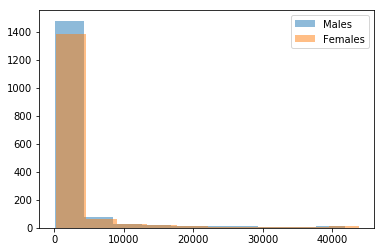

In [304]:
plt.hist(mdf.TotalSum.values, alpha=0.5, label='Males')
plt.hist(fdf.TotalSum.values, alpha=0.5, label='Females')
plt.legend(loc='upper right')

In [305]:
cdf.columns.values

array(['Gender', 'FMeasure', 'CharLength', 'TFPunctuation', 'TFStopWords',
       'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'ConversationCount', 'AtHomeCount', 'FamilyCount', 'TimeCount',
       'WorkCount', 'PastActionsCount', 'GamesCount', 'InternetCount',
       'LocationCount', 'FunCount', 'Food/ClothesCount', 'PoeticCount',
       'Books/MoviesCount', 'ReligionCount', 'RomanceCount',
       'SwearingCount', 'PoliticsCount', 'MusicCount', 'SchoolCount',
       'BusinessCount', 'PositiveCount', 'NegativeCount', 'EmotionCount',
       'ProperNounCount', 'SentenceCount', 'AvgSentLength',
       'UpperCaseChars', 'UpperCaseWords', 'TitleCaseWords'], dtype=object)

In [344]:
cdf['TotalProduct'] = (cdf['FMeasure'] * cdf['CharLength'] * cdf['TFPunctuation'] * cdf['TFStopWords'] * cdf['ProperNounCount'] * cdf['SentenceCount'] * cdf['AvgSentLength'] * cdf['UpperCaseChars'] * cdf['UpperCaseWords'] * cdf['TitleCaseWords']) / 1e30

/home/binoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [345]:
mdfp = cdf[cdf.Gender == 'M']
fdfp = cdf[cdf.Gender == 'F']

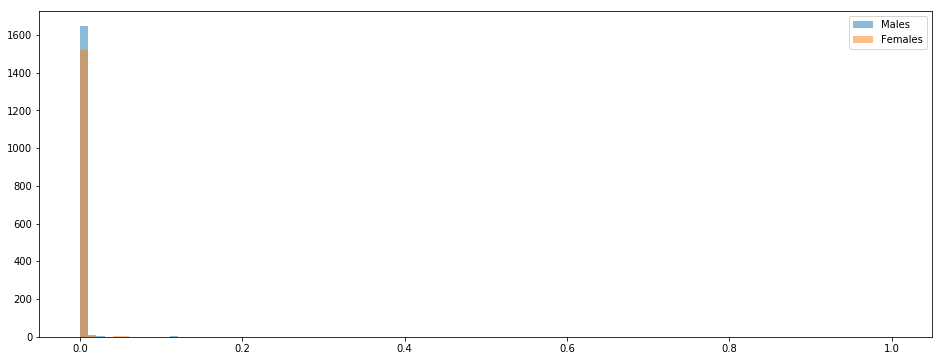

In [361]:
bins = np.linspace(0, 1, 100)
plt.figure(figsize=(16,6))
plt.hist(mdfp.TotalProduct.values, bins=bins, alpha=0.5, label='Males')
plt.hist(fdfp.TotalProduct.values, bins=bins, alpha=0.5, label='Females')
plt.legend(loc='upper right')

In [348]:
print(mdfp.TotalProduct.values.mean(), fdfp.TotalProduct.values.mean())
print(np.median(mdfp.TotalProduct.values), np.median(fdfp.TotalProduct.values))

0.001912498131147689 0.004367096285593612
4.608391051240703e-15 4.13859987405111e-15


(array([1.661e+03, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.08015101, 0.16030201, 0.24045302, 0.32060403,
        0.40075503, 0.48090604, 0.56105705, 0.64120805, 0.72135906,
        0.80151007]),
 <a list of 10 Patch objects>)

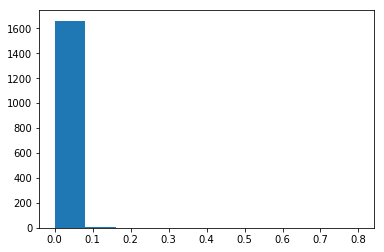

In [349]:
plt.hist(mdfp.TotalProduct.values, label='Males')

(array([1.54e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([0.        , 0.44693947, 0.89387893, 1.3408184 , 1.78775787,
        2.23469734, 2.6816368 , 3.12857627, 3.57551574, 4.0224552 ,
        4.46939467]),
 <a list of 10 Patch objects>)

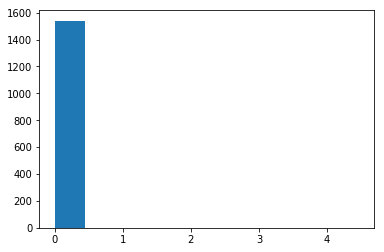

In [350]:
bins = np.linspace(0, 10, 100)
plt.hist(fdfp.TotalProduct.values, label='Females')

In [351]:
print(fdfp.TotalProduct.values.max(), fdfp.TotalProduct.values.min())

4.469394671672698 0.0


In [352]:
print(mdfp.TotalProduct.values.max(), mdfp.TotalProduct.values.min())

0.8015100668337026 0.0
